In [88]:
import os
myfile='/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_models/fgco2_Omon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc'
os.path.isfile(myfile)

True

In [73]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from iris import *
from iris.analysis import *
from iris.analysis.cartography import *
from collections.abc import Iterable, Mapping
import operator
import iris.coords
import iris.exceptions
import numpy as np


In [89]:
path = '/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_models/fgco2_Omon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc'

my_cube = load_cube(path)

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(


In [90]:
print(my_cube)

surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 120; cell index along second dimension: 385; cell index along first dimension: 360)
    Dimension coordinates:
        time                                                                         x                                       -                                      -
        cell index along second dimension                                            -                                       x                                      -
        cell index along first dimension                                             -                                       -                                      x
    Auxiliary coordinates:
        latitude                                                                     -                                       x                                      x
        longitude                                                                    -                         

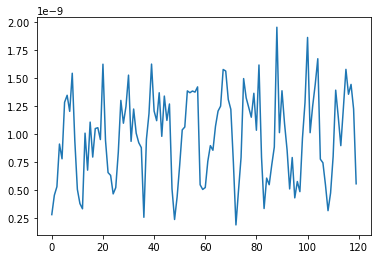

In [6]:
lat = 50
lon = 100

plt.plot(my_cube[:,lat,lon].data)

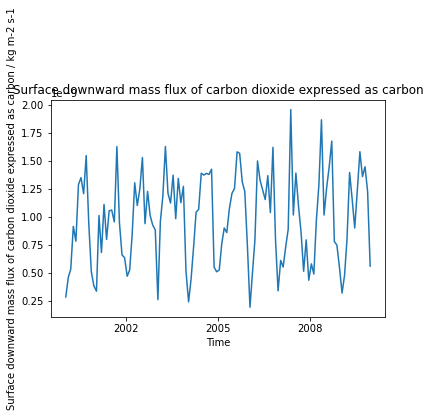

In [7]:
quickplot.plot(my_cube[:,lat,lon])

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'cell index along first dimension' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'cell index along second dimension' is not bounded, guessing contiguous bounds.
  warnings.warn(


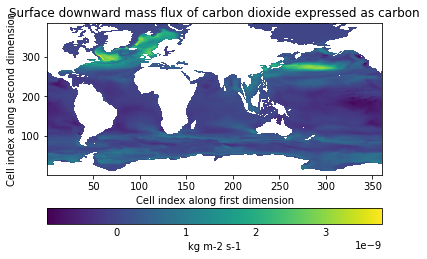

In [74]:
quickplot.pcolormesh(my_cube[0])
plt.savefig('test.png')
plt.show()


In [75]:
lons = my_cube.coord('longitude').points
lats = my_cube.coord('latitude').points

In [83]:
import iris
from iris.coord_categorisation import *

#extracting just two months from a cube with all of teh months - here 1 and 12: January and December
cube = iris.load_cube('/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_models/fgco2_Omon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc')
add_month_number(cube, 'time', name='month_number')
cube2 = cube[np.where((cube.coord('month_number').points == 12) | (cube.coord('month_number') == 1))]
add_season_year(cube2,'time',name='season_year')

#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube 2 then contains the averaged for each december-january period in each year



/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(


<iris 'Cube' of surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 10; cell index along second dimension: 385; cell index along first dimension: 360)>

In [80]:
average_across_time=my_cube.collapsed(['time'],MEAN)
my_cube.coord('latitude').guess_bounds()
my_cube.coord('longitude').guess_bounds()
grid_areas = area_weights(my_cube)
average_variable = my_cube.collapsed(['latitude','longitude'],MEAN,weights=grid_areas)

#plot the timeseries:
qplt.plot(average_variable)
plt.savefig('test2.png')
plt.show()



CoordinateMultiDimError: Multi-dimensional coordinate not supported: 'latitude'

In [51]:
fgco2=my_cube[0]
print(fgco2)

surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (cell index along second dimension: 385; cell index along first dimension: 360)
    Dimension coordinates:
        cell index along second dimension                                                                         x                                      -
        cell index along first dimension                                                                          -                                      x
    Auxiliary coordinates:
        latitude                                                                                                  x                                      x
        longitude                                                                                                 x                                      x
    Scalar coordinates:
        depth                                                                   0.0 m
        time                                            

In [78]:

fgco2 = iris.load_cube(filename, 'fgco2') 
print(fgco2)


fgco2_cube, latitude_cube = iris.load_cubes(filename, ['fgco2', 'latitude'])

surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 120; cell index along second dimension: 385; cell index along first dimension: 360)
    Dimension coordinates:
        time                                                                         x                                       -                                      -
        cell index along second dimension                                            -                                       x                                      -
        cell index along first dimension                                             -                                       -                                      x
    Auxiliary coordinates:
        latitude                                                                     -                                       x                                      x
        longitude                                                                    -                         

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(
/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(


ConstraintMismatchError: 
   Constraint(name='latitude') -> 0 cubes

In [57]:
for coord in my_cube.coords():
    print(coord.name())

time
cell index along second dimension
cell index along first dimension
depth
latitude
longitude


In [63]:
coord=my_cube.coord('time')
print(type(coord))

<class 'iris.coords.DimCoord'>


In [64]:
print(coord.standard_name)
print(coord.long_name)
print(coord.units)

time
time
days since 1800-01-01 00:00


In [65]:
print(type(coord.points))
print(type(coord.bounds))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [67]:
import iris.coords as icoords

In [72]:
for yx_slice in my_cube.slices(['depth']):
   print(repr(yx_slice))

ValueError: Requested an iterator over a coordinate (depth) which does not describe a dimension.